In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"
import findspark
findspark.init()

spark-2.4.8-bin-hadoop2.7/
spark-2.4.8-bin-hadoop2.7/LICENSE
spark-2.4.8-bin-hadoop2.7/NOTICE
spark-2.4.8-bin-hadoop2.7/R/
spark-2.4.8-bin-hadoop2.7/R/lib/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/DESCRIPTION
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/Rd.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/hsearch.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/links.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/nsInfo.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/package.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/NAMESPACE
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/help/An

In [2]:
import pyspark
import os

In [3]:
from pyspark.sql import *

In [4]:
# cai dat va thiet lap bien moi truong nêu chay tren colab
SUBMIT_ARGS = "--packages graphframes:graphframes:0.8.1-spark2.4-s_2.11 pyspark-shell"
os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS

In [5]:
conf = pyspark.SparkConf()
sc = pyspark.SparkContext(conf=conf)
print(sc._conf.getAll())

[('spark.repl.local.jars', 'file:///root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,file:///root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.files', 'file:///root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,file:///root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.executor.id', 'driver'), ('spark.app.name', 'pyspark-shell'), ('spark.jars', 'file:///root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,file:///root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.driver.port', '43175'), ('spark.app.id', 'local-1648209215098'), ('spark.rdd.compress', 'True'), ('spark.serializer.objectStreamReset', '100'), ('spark.master', 'local[*]'), ('spark.submit.deployMode', 'client'), ('spark.driver.host', 'cc8900b0bce6'), ('spark.submit.pyFiles', '/root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,/root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.ui.showConsoleProgress', 'true')]


### Tạo graph

In [6]:
from graphframes import *

In [7]:
spark = SparkSession(sc)

In [8]:
vertices = spark.createDataFrame([('1', 'Carter', 50), 
                                  ('2', 'May', 26),
                                 ('3', 'Mills', 80),
                                  ('4', 'Hood', 65),
                                  ('5', 'Banks', 93),
                                 ('98', 'Berg', 28),
                                 ('99', 'Page', 16)],
                                 ['id', 'name', 'age'])
edges = spark.createDataFrame([('1', '2', 'friend'),
                               ('1', '98', 'friend'), 
                               ('2', '1', 'friend'),
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('2', '3', 'follows'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                              ('98', '99', 'friend'),
                              ('99', '98', 'friend')],
                              ['src', 'dst', 'type'])

In [9]:
g = GraphFrame(vertices, edges)

In [10]:
g

GraphFrame(v:[id: string, name: string ... 1 more field], e:[src: string, dst: string ... 1 more field])

In [11]:
## Take a look at the DataFrames
g.vertices.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  2|   May| 26|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
| 98|  Berg| 28|
| 99|  Page| 16|
+---+------+---+



In [12]:
g.edges.show()

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  1| 98| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+



In [14]:
# check the number of edges of each vertex
g.degrees.show()

+---+------+
| id|degree|
+---+------+
|  3|     7|
| 98|     3|
| 99|     2|
|  5|     3|
|  1|     5|
|  4|     3|
|  2|     3|
+---+------+



In [15]:
g.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  3|       4|
| 98|       2|
| 99|       1|
|  5|       2|
|  1|       2|
|  4|       1|
|  2|       1|
+---+--------+



In [17]:
g.outDegrees.show()

+---+---------+
| id|outDegree|
+---+---------+
|  3|        3|
| 98|        1|
| 99|        1|
|  5|        1|
|  1|        3|
|  4|        2|
|  2|        2|
+---+---------+



In [18]:
import networkx as nx

In [19]:
import matplotlib.pyplot as plt

In [22]:
def PlotGraph(edge_list):
  Gplot=nx.Graph()
  for row in edge_list.select('src','dst').take(1000):
    Gplot.add_edge(row['src'],row['dst'])
  nx.draw(Gplot, with_labels=True, font_weight='bold')

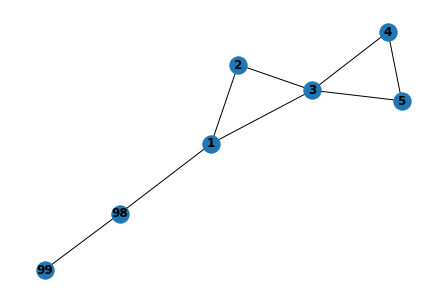

In [23]:
PlotGraph(g.edges)

filtering

In [24]:
g.vertices.filter('age > 30').show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
+---+------+---+



connecting

In [25]:
# GraphFrames requires you to set
# a directory where it can save checkpoints
sc.setCheckpointDir('graphframes_cps')

In [26]:
g.connectedComponents().show()

+---+------+---+------------+
| id|  name|age|   component|
+---+------+---+------------+
|  1|Carter| 50|154618822656|
|  2|   May| 26|154618822656|
|  3| Mills| 80|154618822656|
|  4|  Hood| 65|154618822656|
|  5| Banks| 93|154618822656|
| 98|  Berg| 28|154618822656|
| 99|  Page| 16|154618822656|
+---+------+---+------------+



* Only 1 component

In [27]:
mutualFriends = g.find("(a)-[]->(b); (b)-[]->(c); (c)-[]->(b); (b)-[]->(a)").dropDuplicates()

In [28]:
mutualFriends.show()

+---------------+---------------+---------------+
|              a|              b|              c|
+---------------+---------------+---------------+
|[1, Carter, 50]|   [2, May, 26]|[1, Carter, 50]|
| [5, Banks, 93]| [3, Mills, 80]| [5, Banks, 93]|
| [5, Banks, 93]| [3, Mills, 80]|[1, Carter, 50]|
| [98, Berg, 28]| [99, Page, 16]| [98, Berg, 28]|
|[1, Carter, 50]| [3, Mills, 80]|[1, Carter, 50]|
|   [2, May, 26]|[1, Carter, 50]| [3, Mills, 80]|
|  [4, Hood, 65]| [3, Mills, 80]|[1, Carter, 50]|
|   [2, May, 26]|[1, Carter, 50]|   [2, May, 26]|
| [3, Mills, 80]|  [4, Hood, 65]| [3, Mills, 80]|
| [3, Mills, 80]| [5, Banks, 93]| [3, Mills, 80]|
|  [4, Hood, 65]| [3, Mills, 80]|  [4, Hood, 65]|
| [3, Mills, 80]|[1, Carter, 50]| [3, Mills, 80]|
|  [4, Hood, 65]| [3, Mills, 80]| [5, Banks, 93]|
|[1, Carter, 50]| [3, Mills, 80]| [5, Banks, 93]|
| [5, Banks, 93]| [3, Mills, 80]|  [4, Hood, 65]|
| [3, Mills, 80]|[1, Carter, 50]|   [2, May, 26]|
|[1, Carter, 50]| [3, Mills, 80]|  [4, Hood, 65]|


In [30]:
mutualFriends.filter('a.id==2 and c.id==3').show()

+------------+---------------+--------------+
|           a|              b|             c|
+------------+---------------+--------------+
|[2, May, 26]|[1, Carter, 50]|[3, Mills, 80]|
+------------+---------------+--------------+



triangleCount

In [31]:
g.triangleCount().show()

+-----+---+------+---+
|count| id|  name|age|
+-----+---+------+---+
|    2|  3| Mills| 80|
|    0| 98|  Berg| 28|
|    0| 99|  Page| 16|
|    1|  5| Banks| 93|
|    1|  1|Carter| 50|
|    1|  4|  Hood| 65|
|    1|  2|   May| 26|
+-----+---+------+---+



pageRank

In [32]:
pr = g.pageRank(resetProbability=0.15, tol=0.01)

In [33]:
# look at the pagerank score for every vertex
pr.vertices.show()

+---+------+---+------------------+
| id|  name|age|          pagerank|
+---+------+---+------------------+
|  1|Carter| 50|0.6799541646597174|
|  3| Mills| 80| 1.360269120202177|
|  2|   May| 26|0.3505290564027432|
|  4|  Hood| 65|0.5442781769957595|
| 98|  Berg| 28| 1.693795983443179|
|  5| Banks| 93|0.7695218034237804|
| 99|  Page| 16|1.6016516948726431|
+---+------+---+------------------+



In [34]:
# look at the weight of every edge
pr.edges.show()

+---+---+-------+------------------+
|src|dst|   type|            weight|
+---+---+-------+------------------+
|  1|  2| friend|0.3333333333333333|
| 99| 98| friend|               1.0|
|  1|  3| friend|0.3333333333333333|
|  4|  5|follows|               0.5|
|  5|  3| friend|               1.0|
| 98| 99| friend|               1.0|
|  3|  5| friend|0.3333333333333333|
|  4|  3| friend|               0.5|
|  2|  1| friend|               0.5|
|  3|  4| friend|0.3333333333333333|
|  1| 98| friend|0.3333333333333333|
|  3|  1| friend|0.3333333333333333|
|  2|  3|follows|               0.5|
+---+---+-------+------------------+



* id 5: in = 3, out = 2
* id 3: in = 3, out = 4
* id 1: in = 2, out = 3